<a href="https://colab.research.google.com/github/ryanharvey1/teamA-grebes-NMA2020/blob/master/trace_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

# plt.rcParams.update({'font.size': 40})
%config InlineBackend.figure_format = 'retina'
import sys
import pandas as pd  
import numpy as np 
from scipy import stats  
from itertools import compress
import os, requests

In [2]:
print('loading data from osf...')
fname = "stringer_spontaneous.npy"
url = "https://osf.io/dpqaj/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())  

loading data from osf...
dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


In [3]:
print('loading speed tuning data...')
speed_map = np.load('/content/drive/My Drive/nma_data/6163622_v6/speed_map.npy')
df = pd.read_pickle("/content/drive/My Drive/nma_data/6163622_v6/speed_df.pkl")
df

loading speed tuning data...


,speed_cor,speed_cor_pvalue,slope,intercept,speed_mod,speed_mod_pvalue
0,0.037081,0.031873,[[0.04655153712639664]],[6.701278006979309],0.029077431,0.059761
1,-0.015747,0.119522,[[-0.008001666373229879]],[5.433671749085655],0.010097089,0.274900
2,-0.008763,0.454183,[[-0.0073181789721904495]],[4.6965754671733455],0.010708806,0.159363
3,0.196378,0.003984,[[0.06816048084295674]],[8.474296393925272],0.16257545,0.035857
4,0.008459,0.278884,[[0.08151148078289507]],[13.27337580967431],0.009054725,0.390438
...,...,...,...,...,...,...
11978,-0.028630,0.007968,[[-0.31601890375345476]],[86.03674125511317],0.0073964316,0.561753
11979,0.009240,0.557769,[[-0.020151207141361857]],[35.48008323940126],0.024111908,0.003984
11980,-0.031522,0.031873,[[-0.010835917051686884]],[32.71565770394717],0.017061893,0.207171
11981,-0.000512,0.968127,[[-0.16513455051549225]],[53.14822019287467],0.0088076275,0.266932


In [ ]:
max(df.speed_mod)

array(0.8466121, dtype=float32)

In [ ]:
row = range(len(df))

idx = (df.speed_cor > 0.4) & (df.speed_mod > 0.5) & (df.speed_cor_pvalue < 0.05) & (df.speed_mod_pvalue < 0.05)

print(list(compress(row,idx)))

idx = (df.speed_cor < -0.2) & (df.speed_mod > 0.1) & (df.speed_cor_pvalue < 0.05) & (df.speed_mod_pvalue < 0.05)

print(list(compress(row,idx)))

[1373, 6472]
[455, 1680, 2963, 5491, 6897]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

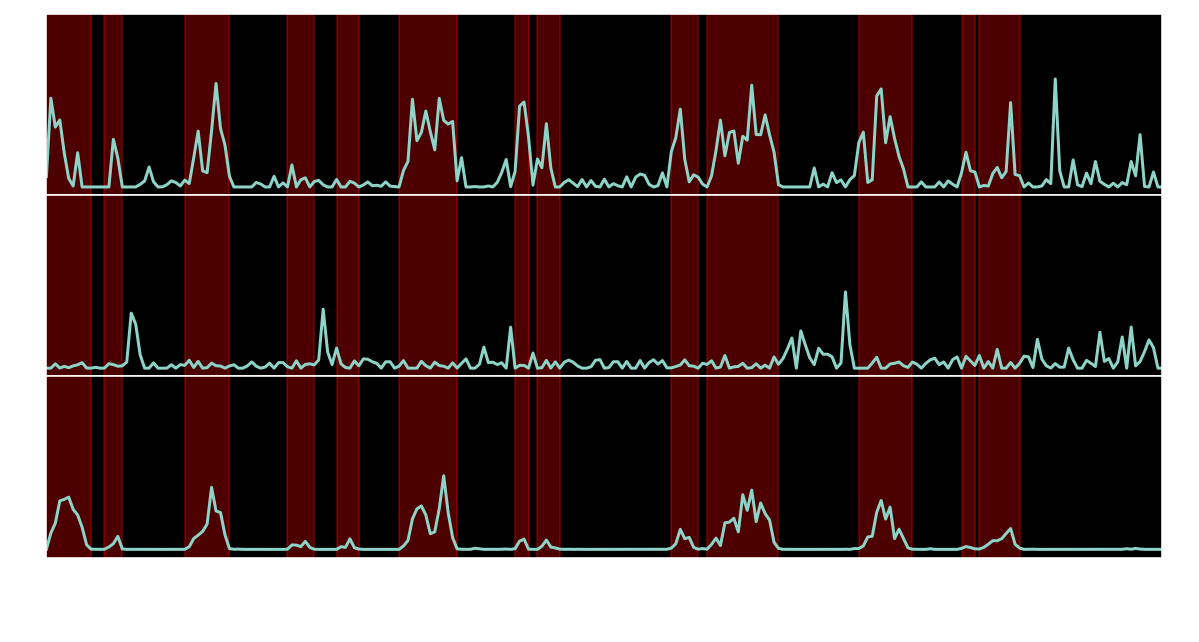

In [204]:
duration = int(200*1.2)
ts = np.arange(0,len(dat['run']),1)

start,ends = find_groups(dat['run'],0.5)

fig, axs = plt.subplots(3,1, figsize=(10,5), edgecolor='k')
fig.subplots_adjust(hspace = 0, wspace=0.1)


axs[0].plot(ts,dat['sresp'][1373])
axs[0].get_yaxis().set_ticks([])
axs[0].set_ylabel('$\Delta F / F$')
axs[0].get_xaxis().set_ticks([])

for i in range(len(start)):
    axs[0].axvspan(start[i], ends[i],
                alpha=0.3, color='red', zorder=-1000)  
axs[0].set_xlim((0,250))

axs[1].plot(ts,dat['sresp'][2963])
axs[1].get_yaxis().set_ticks([])
axs[1].set_ylabel('$\Delta F / F$')
axs[1].get_xaxis().set_ticks([])

for i in range(len(start)):
    axs[1].axvspan(start[i], ends[i],
                alpha=0.3, color='red', zorder=-1000)  
axs[1].set_xlim((0,250))

axs[2].plot(ts,dat['run'])
axs[2].set_ylabel('running')
axs[2].get_yaxis().set_ticks([])
plt.xlabel('time (sec)')

for i in range(len(start)):
    axs[2].axvspan(start[i], ends[i],
                alpha=0.3, color='red', zorder=-1000)  
axs[2].set_xlim((0,250))

from google.colab import files
fig.savefig("v1_runing_example.png",dpi=600,transparent=True)
files.download("v1_runing_example.png")

Text(0, 0.5, '$\\Delta F / F$')

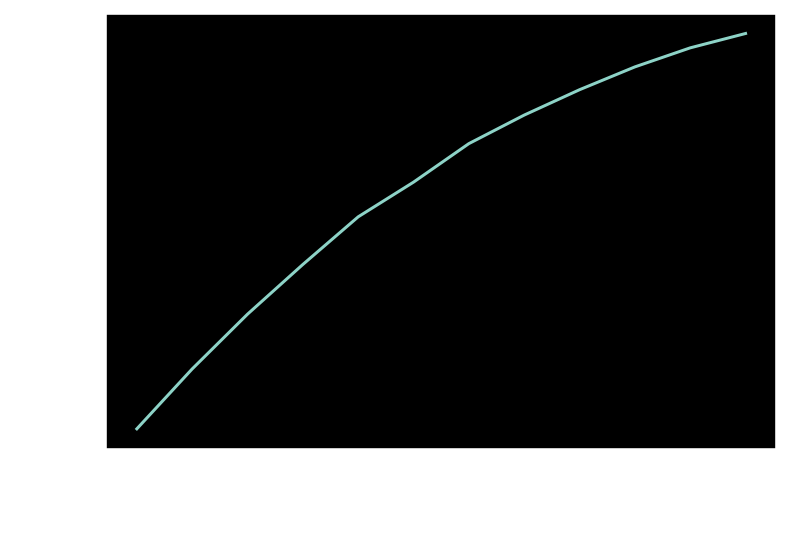

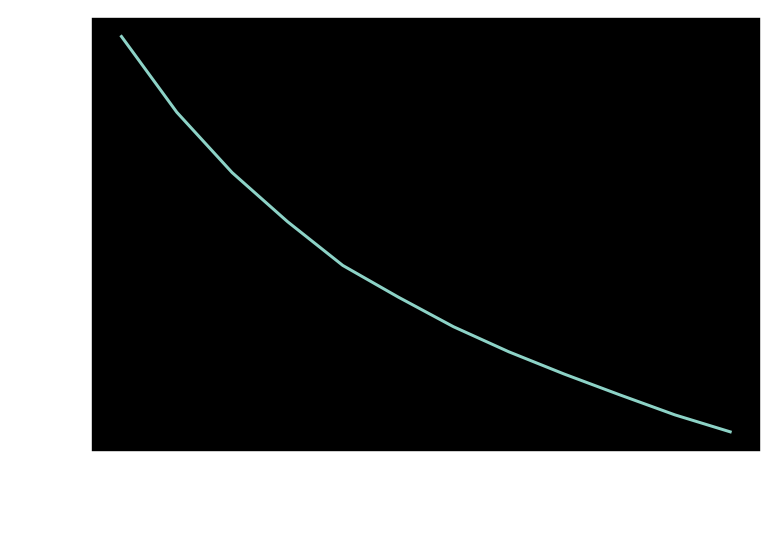

In [ ]:
plt.figure()
plt.plot(speed_map[1373])
plt.xlabel('running (au)')
plt.ylabel('$\Delta F / F$')

plt.figure()
plt.plot(speed_map[2963])
plt.xlabel('running (au)')
plt.ylabel('$\Delta F / F$')

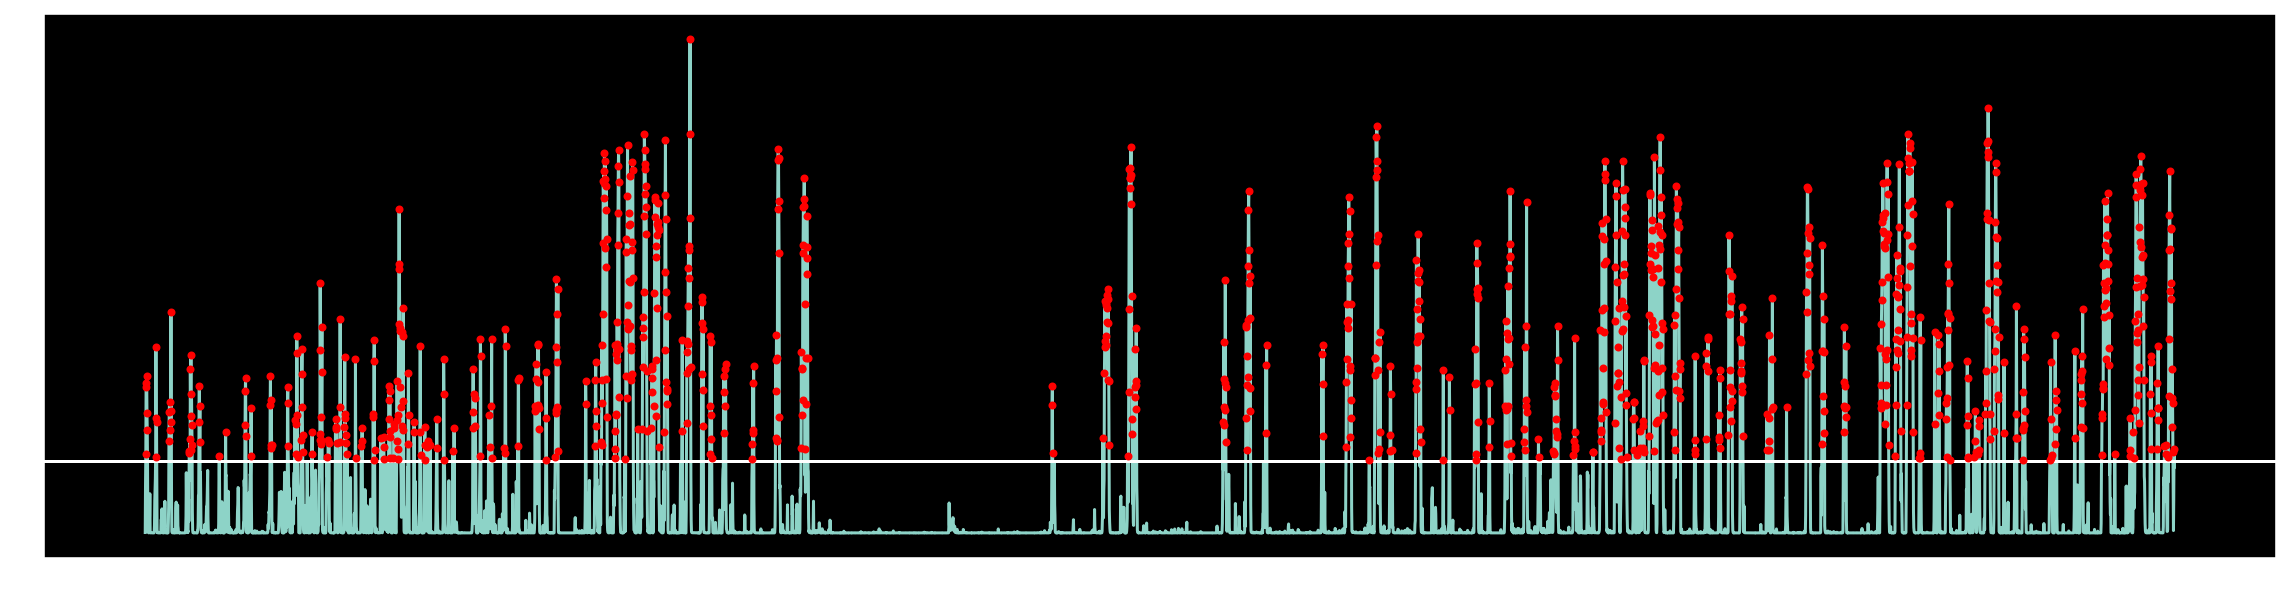

In [ ]:
run = dat['run']
# def detect_run(run):
ts = np.arange(0,len(run),1)
run = stats.zscore(run)

plt.subplots(figsize=(20,5), edgecolor='k')
plt.plot(ts,run)
plt.axhline(y=0.5)

idx = run[:,0] > 0.5
plt.plot(ts[idx],run[idx],'.r')

# detect_run(dat['run'])  

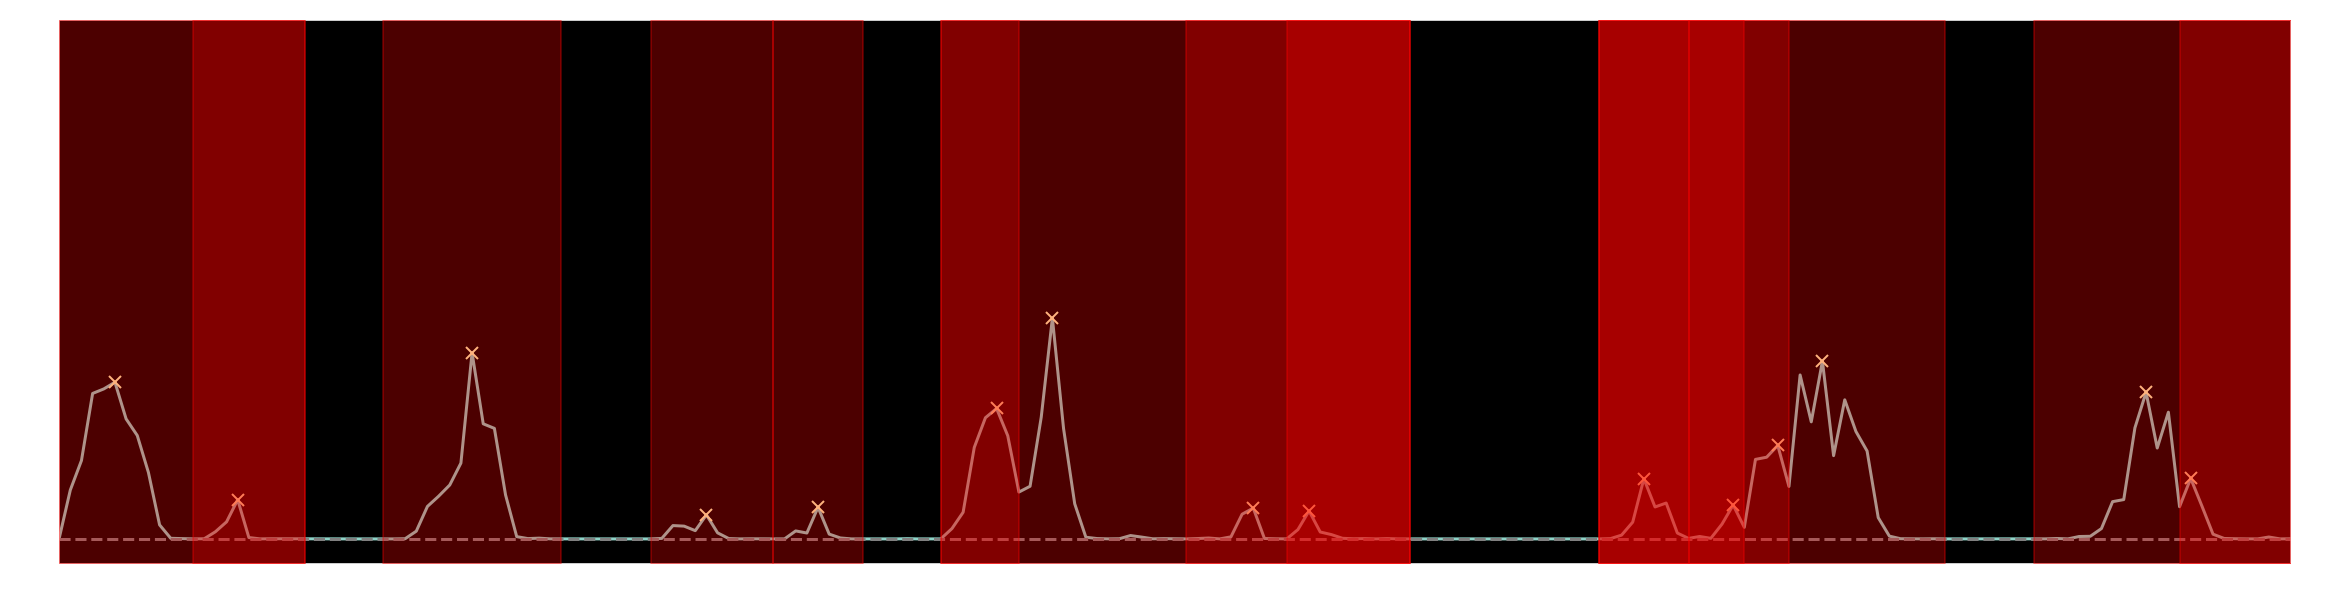

In [94]:
from scipy.signal import find_peaks
find_peaks(run[:,0]) 

x = run[:,0]
ts = range(len(x))
peaks, properties = find_peaks(x,prominence=1,height=0.5,distance=4)

plt.subplots(figsize=(20,5), edgecolor='k')
plt.plot(ts,x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")

# for xc in properties['right_bases']:
#   plt.axvline(x=xc,color='r')

# for xc in properties['left_bases']:
#   plt.axvline(x=xc,color='g')

for i in range(len(peaks)):
    plt.axvspan(properties['left_bases'][i], properties['right_bases'][i],
                alpha=0.3, color='red', zorder=1000)  

plt.xlim((0,200))
plt.show()

In [97]:
properties['prominences'][0]

18.198428141780195

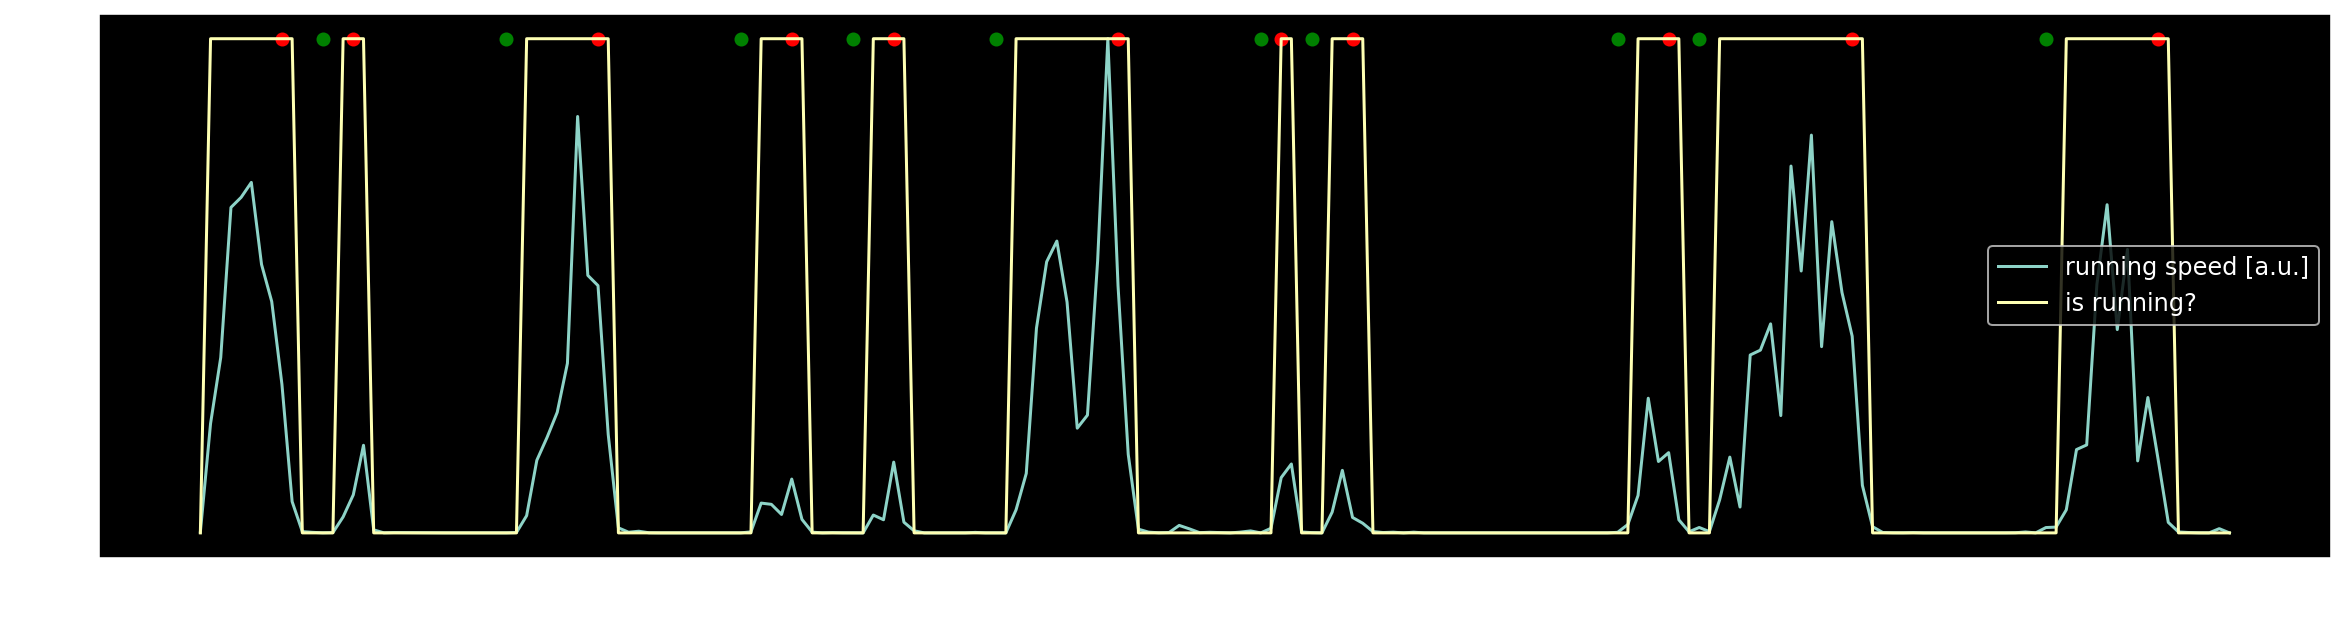

In [107]:
run_thres = 0.5 #cut-off threhold for running speed to be considered running [a.u.]

#function to detm if running
def is_running(x):
  if x >= run_thres:
    return 1
  else:
    return 0

# map the above funtion to our run
is_run = np.array([is_running(xi) for xi in run])

# #plot
# plt.subplots(figsize=(20,5), edgecolor='k')
# plt.plot(run[:stop_len]/ max(run[:stop_len]), label = "running speed [a.u.]")
# plt.plot(is_run[:stop_len], label = "is running?")
# plt.xlabel("Time")
# plt.ylabel("Running")
# plt.legend()
# plt.show()

stop_len = 200
searchval = [0,0,1,1]

idx = [np.s_[i:len(is_run) - len(searchval) +1+i] for i in range(len(searchval))]
x = [is_run[idx[i]] == searchval[i] for i in range(len(searchval))]
x = np.all(x, axis=0)
run_starts = np.where(x)[0]

searchval = [1,1,0,0]
idx = [np.s_[i:len(is_run) - len(searchval) +1+i] for i in range(len(searchval))]
x = [is_run[idx[i]] == searchval[i] for i in range(len(searchval))]
x = np.all(x, axis=0)
run_ends = np.where(x)[0]

#plot
plt.subplots(figsize=(20,5), edgecolor='k')
plt.plot(run[:stop_len]/ max(run[:stop_len]), label = "running speed [a.u.]")
plt.plot(is_run[:stop_len], label = "is running?")
plt.scatter(run_starts[run_starts < stop_len], np.repeat(1, len(run_starts[run_starts < stop_len])), color = "green")

plt.scatter(run_ends[run_ends < stop_len], np.repeat(1, len(run_ends[run_ends < stop_len])), color = "red")

plt.xlabel("Time")
plt.ylabel("Running")
plt.legend()
plt.show()


In [182]:
def find_groups(x,thres):
  x = x > thres
  x = x[:,0]*1
  x = np.hstack((0,x))

  #locate number of groups
  ngroups=sum(np.diff(x)==1);

  #locate start of group
  x_ind = np.arange(0,len(x)-1,1)
  start = x_ind[np.diff(x)==1][0:-1] - 1

  #locate end of group
  x_ind = np.arange(0,len(x)-1,1)
  ends = x_ind[np.diff(x)==-1]

  return start,ends

(0.0, 250.0)

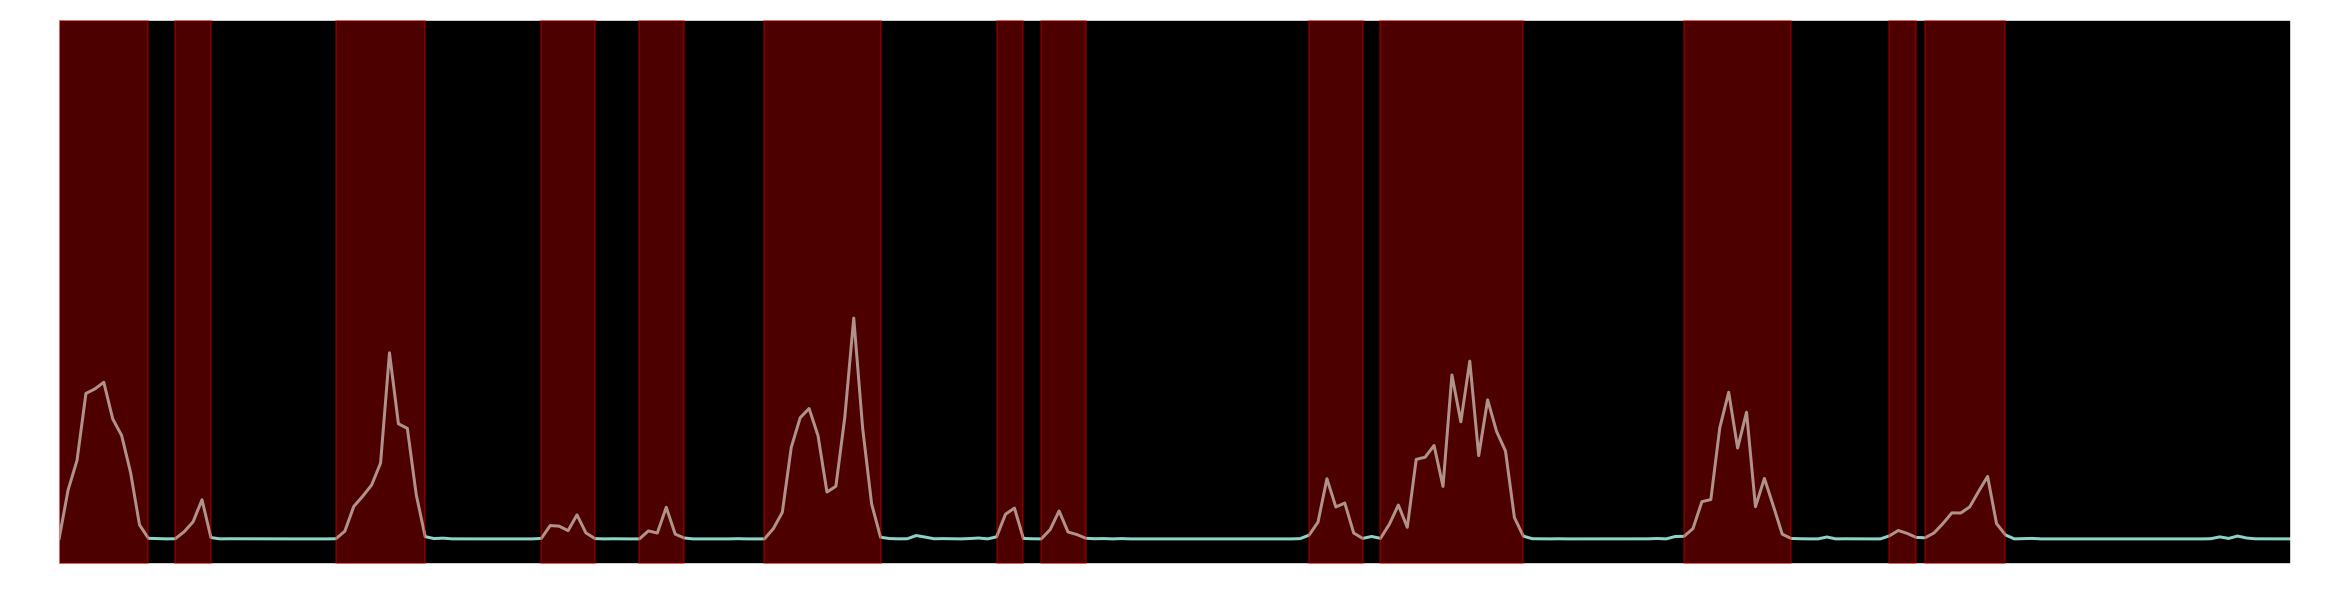

In [189]:
x = run[:,0]

start,ends = find_groups(run,0.5)

ts = np.array(range(len(x)))
plt.subplots(figsize=(20,5), edgecolor='k')
plt.plot(ts,x)

for i in range(len(start)):
    plt.axvspan(start[i], ends[i],
                alpha=0.3, color='red', zorder=1000)  
    
plt.xlim((0,250))
# plt.plot(peaks, x[peaks], "x")


In [175]:
ngroups

282